In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
%matplotlib inline
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, explained_variance_score
from sklearn.metrics import mean_squared_log_error, mean_poisson_deviance, mean_gamma_deviance, mean_tweedie_deviance, max_error



In [14]:
df = pd.read_csv("test.csv")
df[['sub_name', 'TAH']] = df['name'].str.split('TAH', 1, expand=True)
df = df.drop(columns=['name'])
df['TAH'] = df['TAH'].str.replace('_', '')
df[df['TAH'] == '0'].sort_values('date')

,date,target_name,origin,pred,target,direction_target,direction_pred,erro,sub_name,TAH
28,2021-08-26,Close,54.709999,54.333752,55.770000,1,0,1.436249,XOM_Q1R_,0
27,2021-08-27,Close,55.770000,55.643883,55.160000,0,0,0.483883,XOM_Q1R_,0
26,2021-08-30,Close,55.160000,55.353851,54.520000,0,1,0.833851,XOM_Q1R_,0
25,2021-08-31,Close,54.520000,54.550579,53.770000,0,1,0.780579,XOM_Q1R_,0
24,2021-09-01,Close,53.770000,53.903473,55.080002,1,1,1.176529,XOM_Q1R_,0
23,2021-09-02,Close,55.080002,54.697044,54.869999,0,0,0.172955,XOM_Q1R_,0
22,2021-09-03,Close,54.869999,54.583187,54.549999,0,0,0.033188,XOM_Q1R_,0
21,2021-09-07,Close,54.549999,54.236919,54.049999,0,0,0.186920,XOM_Q1R_,0
20,2021-09-08,Close,54.049999,53.431534,54.090000,1,0,0.658466,XOM_Q1R_,0
19,2021-09-09,Close,54.090000,53.249313,53.980000,0,0,0.730686,XOM_Q1R_,0


In [11]:
df.groupby('TAH').describe()['erro']

,count,mean,std,min,25%,50%,75%,max
TAH,,,,,,,,
0,29.0,0.982853,0.715486,0.033188,0.407860,0.780579,1.451393,2.315971
1,30.0,1.386731,0.829810,0.155182,0.731114,1.191349,1.990720,3.398861
2,30.0,1.396719,0.879400,0.197956,0.605344,1.254948,2.114107,3.013569
3,30.0,1.508091,0.988748,0.011475,0.665185,1.421051,2.278000,3.361065
4,30.0,2.025425,1.442903,0.252602,0.866076,1.729134,2.935119,5.300217
5,30.0,2.052515,1.485287,0.038715,0.874702,1.720940,3.188180,5.036491


/tmp/ipykernel_203525/2746238925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['TAH'] = pd.to_numeric(df_1['TAH'])


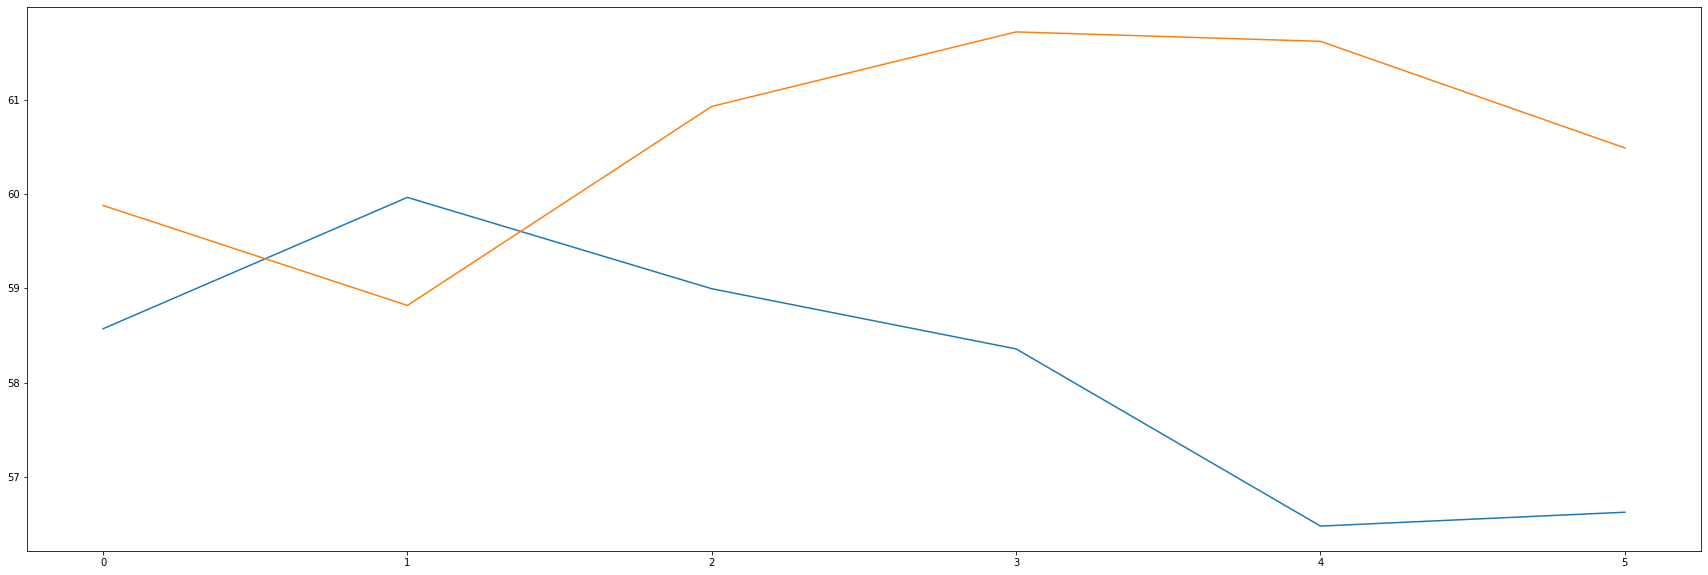

In [49]:
df_1 = df[df['date'] == '2021-09-28']
df_1['TAH'] = pd.to_numeric(df_1['TAH'])
df_1 = df_1.sort_values(by='TAH')
df_1

plt.figure(figsize=(30, 10))
plt.plot(df_1['TAH'], df_1.pred, label = "PREDICT")
plt.plot(df_1['TAH'], df_1.target, label = "REAL")

plt.show()